In [33]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../scripts/')
import robustness_test
import h5py
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
model_paths = ['tutorial_outputs/']
testset_path = '../data/tfr_datasets/i_3072_w_1/'


In [24]:
robustness_test.get_robustness_values(model_paths, testset_path)

In [27]:
output_file = h5py.File('robustness_test_output/tutorial_outputs/variance_of_preds.h5', 'r')


In [35]:
output_file.keys()

<KeysViewHDF5 ['center_ground_truth_1K', 'center_pred', 'prediction_variance', 'robust_pred']>

Text(0.5, 1.0, 'robustness score = 3.853665828704834')

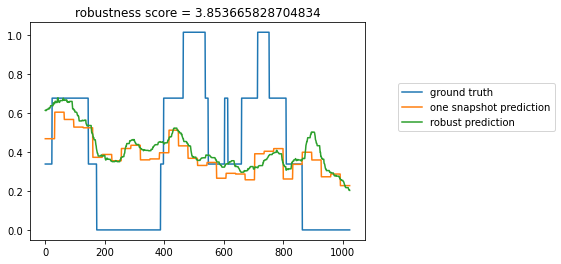

In [48]:
i = 3000
plt.plot(output_file['center_ground_truth_1K'][i,:,0], label='ground truth')
plt.plot(output_file['center_pred'][i,:,0], label='one snapshot prediction')
plt.plot(output_file['robust_pred'][i,:,0], label='robust prediction')
plt.legend(loc=(1.1,0.5))
plt.title('robustness score = {}'.format(output_file['prediction_variance'][i,0]))